<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/8_KMeans_Clustering_Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

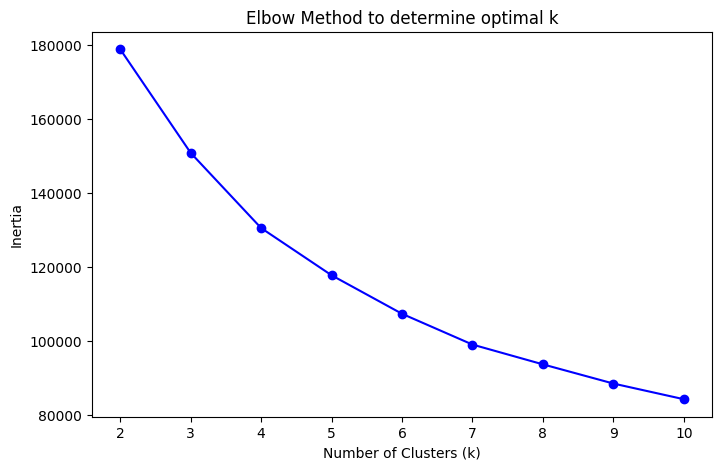

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not already loaded)
CLEANED_PATH = "/content/spotify_audio_features_1960_2019_clean.csv"
df = pd.read_csv(CLEANED_PATH)

# Features for clustering
cluster_features = ['energy', 'danceability', 'tempo', 'valence', 'acousticness', 'instrumentalness']

# Standardize features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])
inertia = []
K = range(2, 11)  # test 2 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine optimal k')
plt.show()


In [ ]:
# Suppose we choose k = 4 (replace with your chosen k)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster sizes
print(df['cluster'].value_counts())


cluster
0    17048
1     9886
2     9758
3     4414
Name: count, dtype: int64


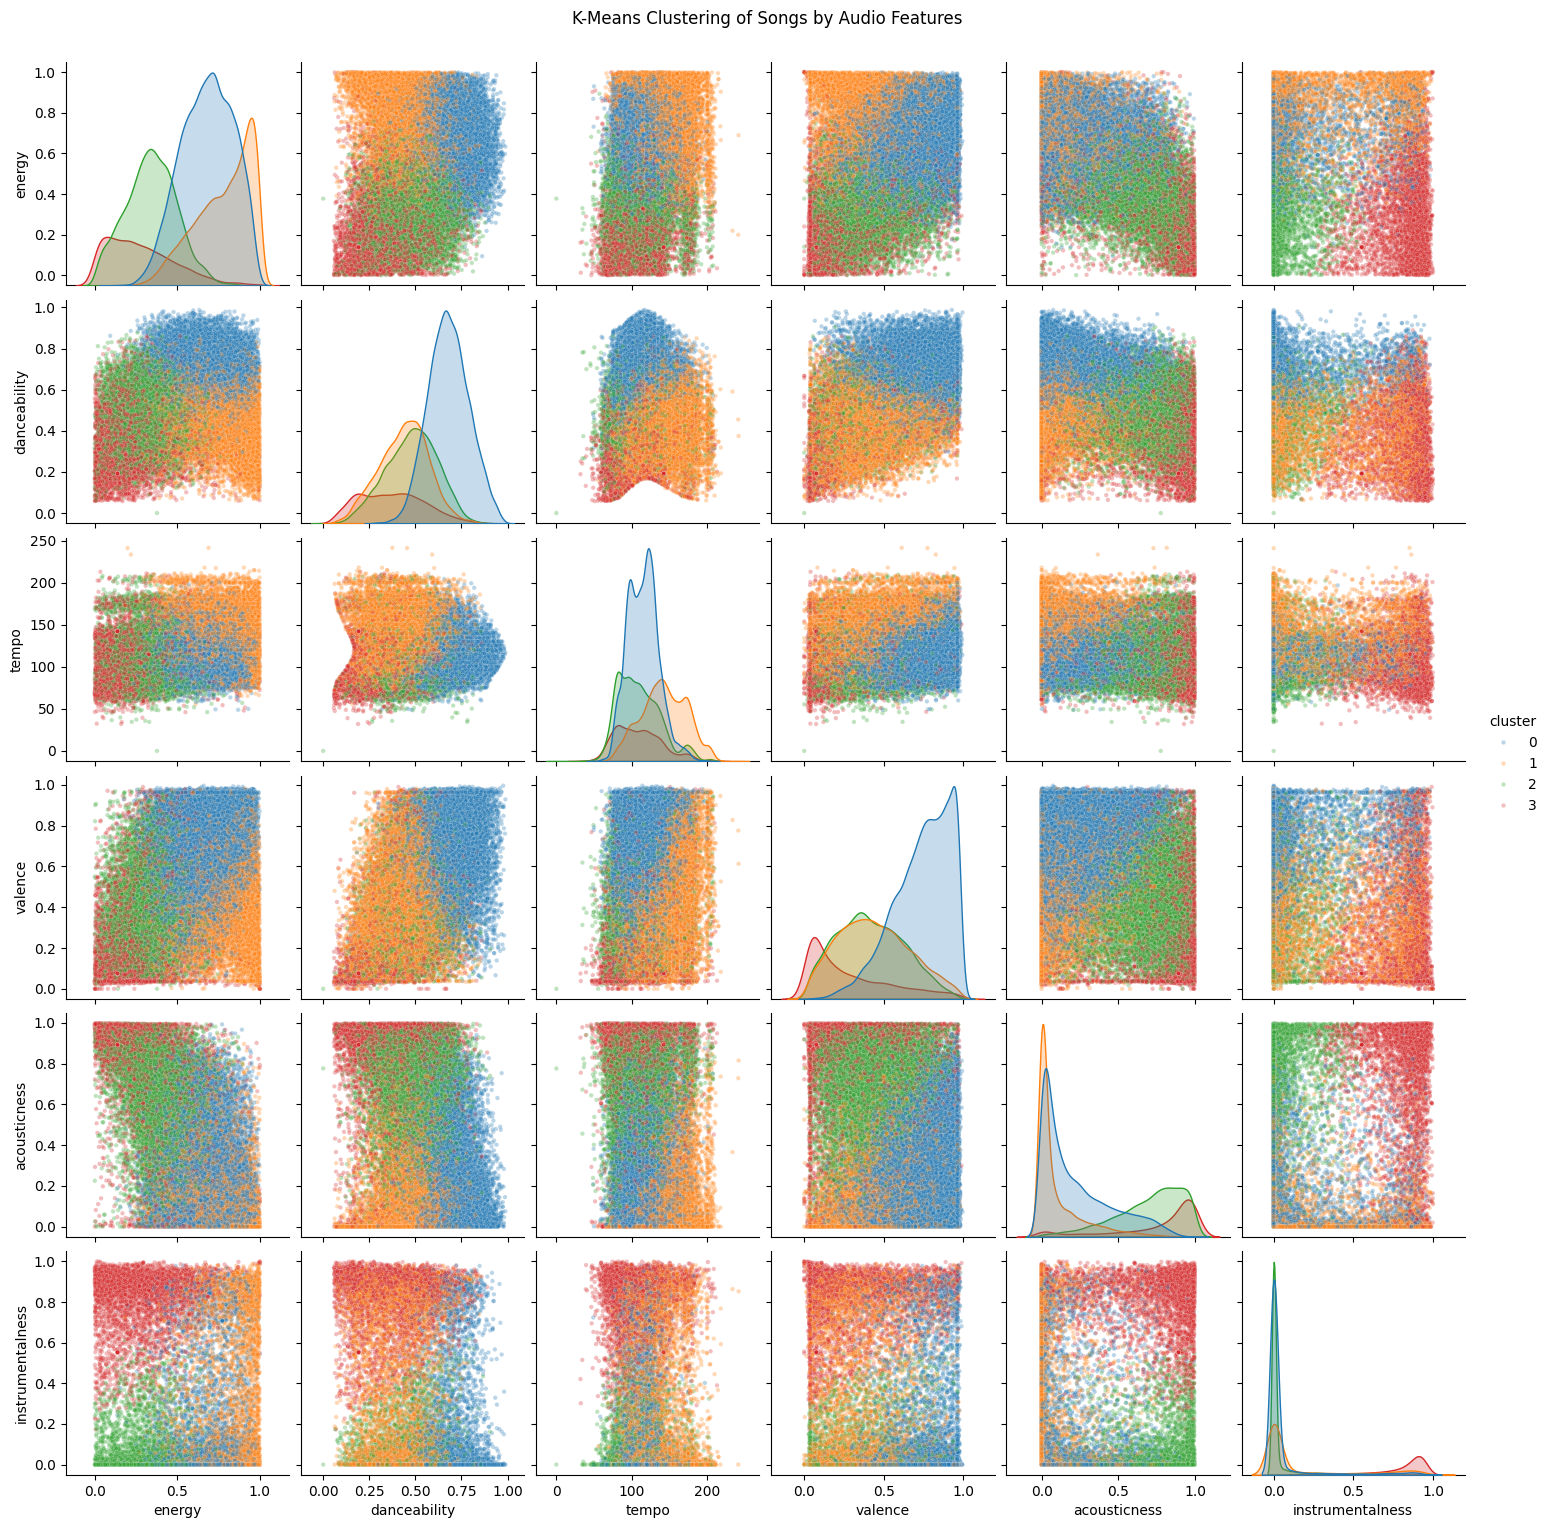

In [ ]:
# Pairplot for cluster visualization
sns.pairplot(df, vars=cluster_features, hue='cluster', palette='tab10', plot_kws={'alpha':0.3, 's':10})
plt.suptitle("K-Means Clustering of Songs by Audio Features", y=1.02)
plt.show()


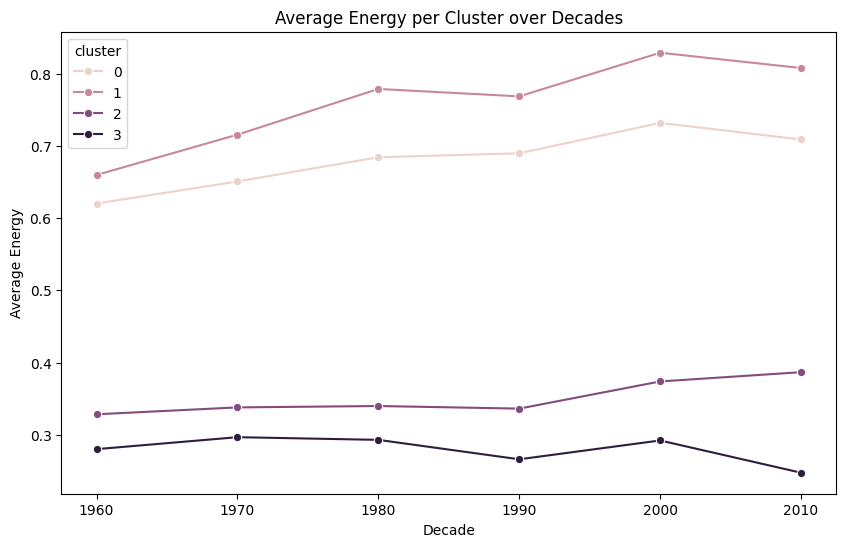

In [ ]:
# Calculate average feature values per cluster per decade
df['decade'] = (df['year'] // 10) * 10
cluster_trends = df.groupby(['decade', 'cluster'])[cluster_features].mean().reset_index()

# Example: Plot cluster energy over decades
plt.figure(figsize=(10,6))
sns.lineplot(data=cluster_trends, x='decade', y='energy', hue='cluster', marker='o')
plt.title('Average Energy per Cluster over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Energy')
plt.show()
